In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import kagglehub
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Bidirectional, RepeatVector, TimeDistributed, Concatenate, Dropout,Attention
from tensorflow.keras.optimizers import Adam
import os

# EDA

In [2]:
df_load = pd.ExcelFile('/Users/Fikry/datasets/load_kaggle/train_dataframes.xlsx')

In [3]:
sheet_names = df_load.sheet_names
sheet_names

['Week 15, Apr 2019',
 'Week 21, May 2019',
 'Week 24, Jun 2019',
 'Week 29, Jul 2019',
 'Week 33, Aug 2019',
 'Week 37, Sep 2019',
 'Week 41, Oct 2019',
 'Week 44, Nov 2019',
 'Week 51, Dec 2019',
 'Week 01, Jan 2020',
 'Week 06, Feb 2020',
 'Week 10, Mar 2020',
 'Week 20, May 2020',
 'Week 24, Jun 2020']

In [4]:
week = pd.read_excel('/Users/Fikry/datasets/load_kaggle/train_dataframes.xlsx', sheet_name='Week 24, Jun 2020')
week

,datetime,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
0,2015-01-31 01:00:00,962.2865,906.9580,970.3450,938.004850,1,1,0,0,1,25.308496,954.2018
1,2015-01-31 02:00:00,933.3221,863.5135,912.1755,900.284075,1,1,0,0,2,25.141443,913.8660
2,2015-01-31 03:00:00,903.9817,848.4447,900.2688,881.704325,1,1,0,0,3,25.006738,903.3637
3,2015-01-31 04:00:00,900.9995,839.8821,889.9538,876.458825,1,1,0,0,4,24.899713,889.0806
4,2015-01-31 05:00:00,904.3481,847.1073,893.6865,879.190775,1,1,0,0,5,24.821558,910.1472
...,...,...,...,...,...,...,...,...,...,...,...,...
46963,2020-06-09 20:00:00,1213.8868,1084.4737,1245.8982,1159.827350,4,0,0,0,20,27.786951,1137.4689
46964,2020-06-09 21:00:00,1205.5671,1077.7786,1252.4514,1157.224850,4,0,0,0,21,27.527551,1124.4658
46965,2020-06-09 22:00:00,1169.3098,1044.4724,1218.7307,1122.634900,4,0,0,0,22,27.292505,1079.9583
46966,2020-06-09 23:00:00,1141.4458,997.7907,1174.9543,1086.631550,4,0,0,0,23,27.118677,1053.3043


In [5]:
df_train = pd.read_csv('/Users/Fikry/datasets/load_kaggle/continuous dataset.csv' ,index_col=[0],parse_dates=[0])
df_train

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26 20:00:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0,0,1
2020-06-26 21:00:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0,0,1
2020-06-26 22:00:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0,0,1


In [6]:
df_train.index = pd.to_datetime(df_train.index)

In [7]:
df_train.isna().sum()

nat_demand    0
T2M_toc       0
QV2M_toc      0
TQL_toc       0
W2M_toc       0
T2M_san       0
QV2M_san      0
TQL_san       0
W2M_san       0
T2M_dav       0
QV2M_dav      0
TQL_dav       0
W2M_dav       0
Holiday_ID    0
holiday       0
school        0
dtype: int64

In [8]:
df_train.duplicated().sum()

0

In [9]:
np.nanmax(df_train["nat_demand"])

1754.882

In [10]:
np.nanmin(df_train["nat_demand"])

85.19250000000002

In [11]:
years = df_train.index.year.unique().tolist()
print(years)

[2015, 2016, 2017, 2018, 2019, 2020]


In [12]:
# Find the minimum value and its index
min_value = np.nanmin(df_train["nat_demand"])
min_index = df_train["nat_demand"].idxmin()

# Print the minimum value and its index
print("Minimum Value:", min_value)
print("Index of Minimum Value:", min_index)

Minimum Value: 85.19250000000002
Index of Minimum Value: 2019-01-20 12:00:00


In [13]:
# Find the minimum value and its index
max_value = np.nanmax(df_train["nat_demand"])
max_index = df_train["nat_demand"].idxmax()

print("Maximum Value:", max_value)
print("Index of Maximum Value:", max_index)

Maximum Value: 1754.882
Index of Maximum Value: 2020-01-17 14:00:00


# Plot

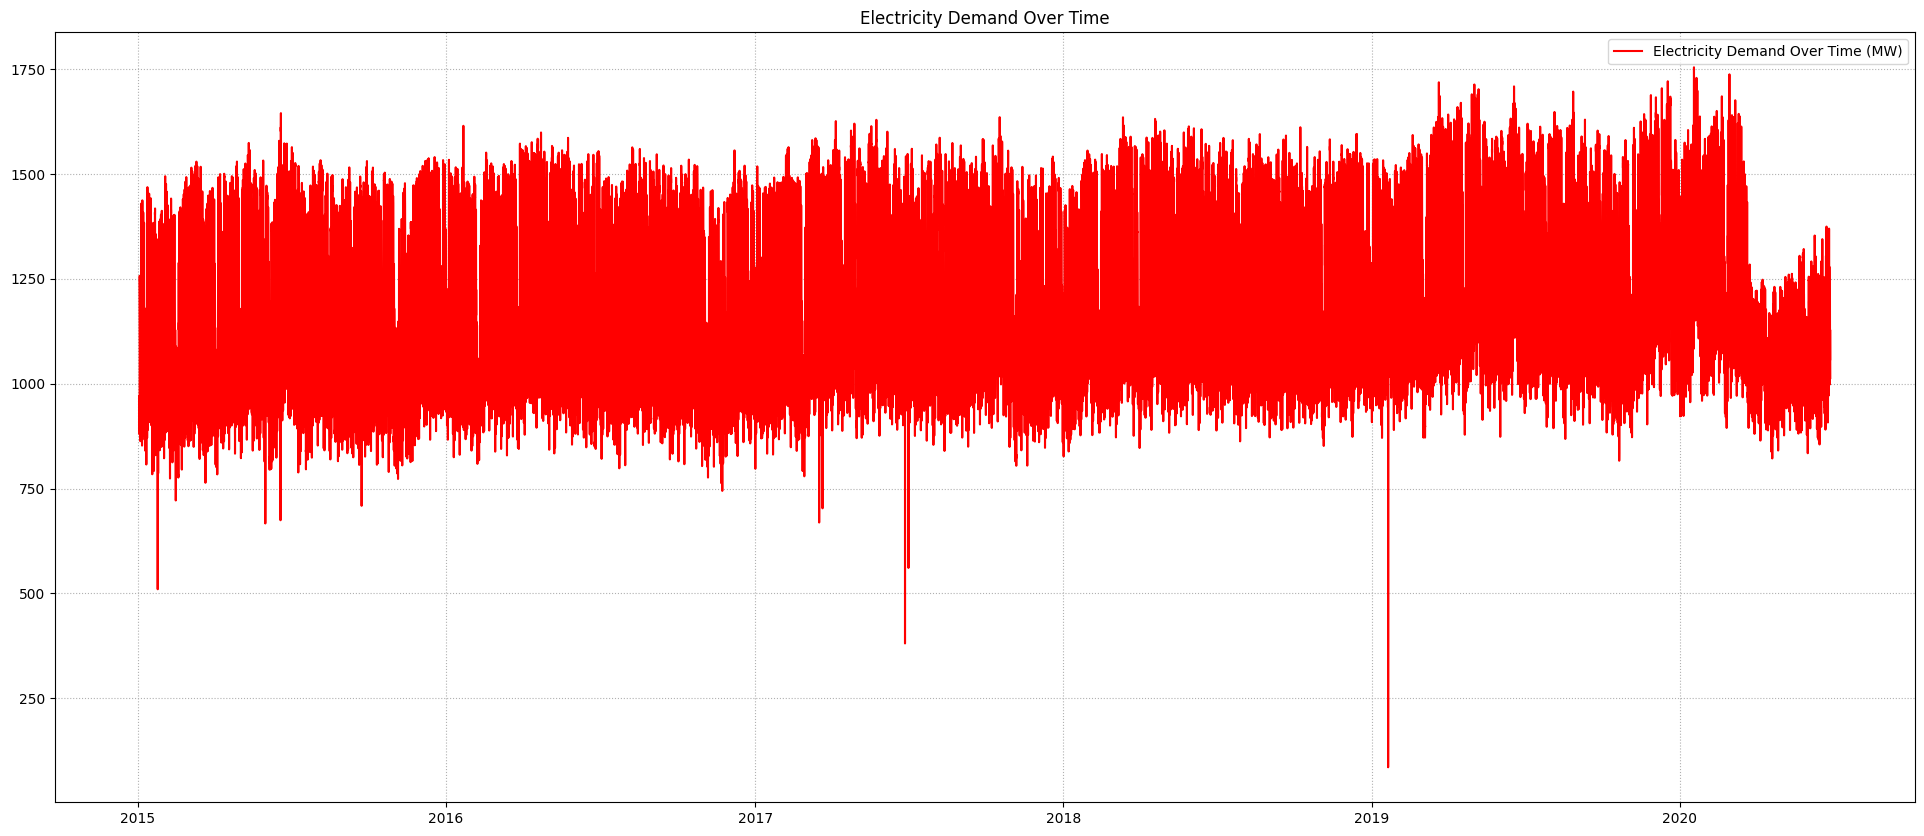

In [14]:
fig, ax1 = plt.subplots(figsize=(24, 10))
ax1.plot(df_train["nat_demand"], '-', color='r', label="Electricity Demand Over Time (MW)")
ax1.legend()
ax1.set_title("Electricity Demand Over Time")

plt.grid(True, linestyle=':', linewidth=0.8)
plt.show()

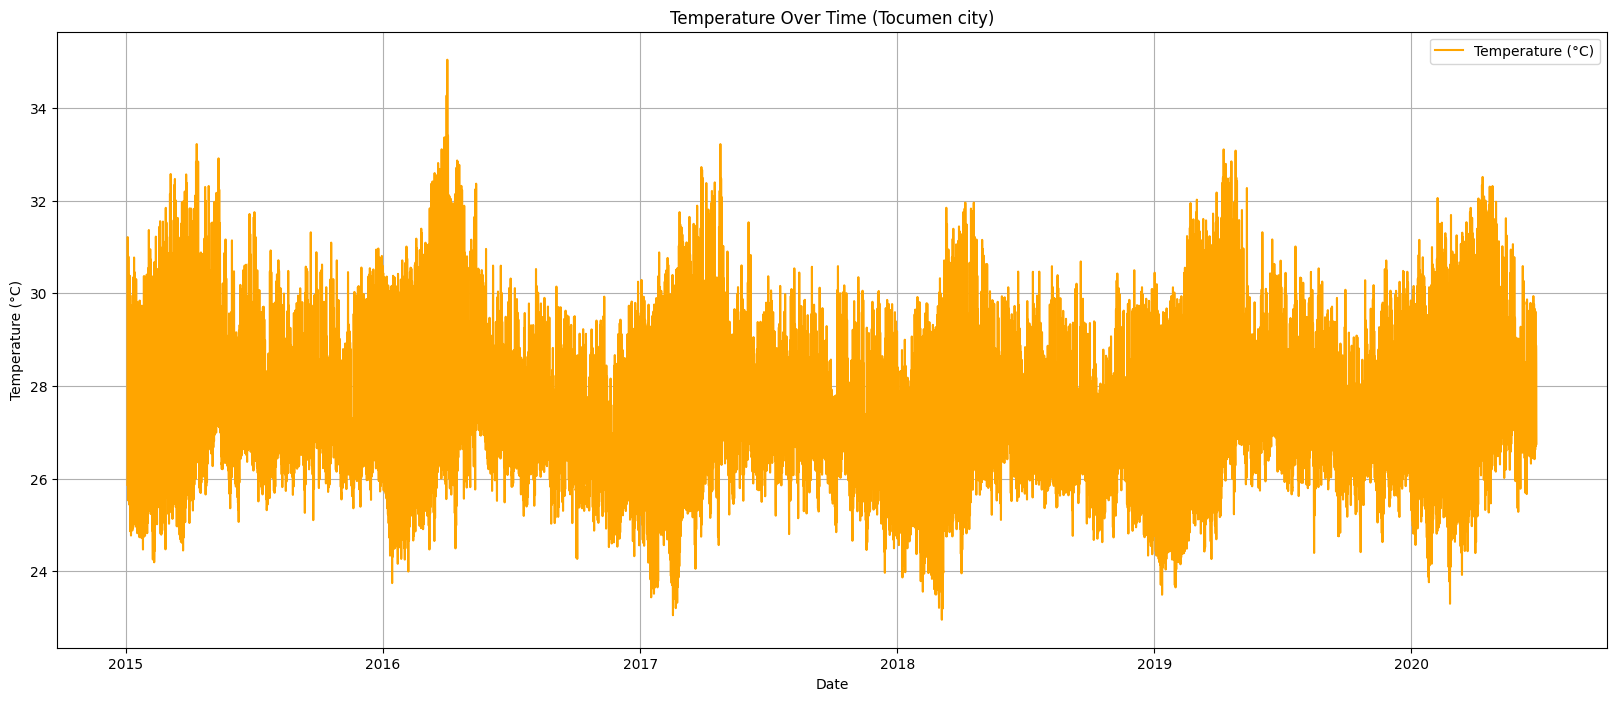

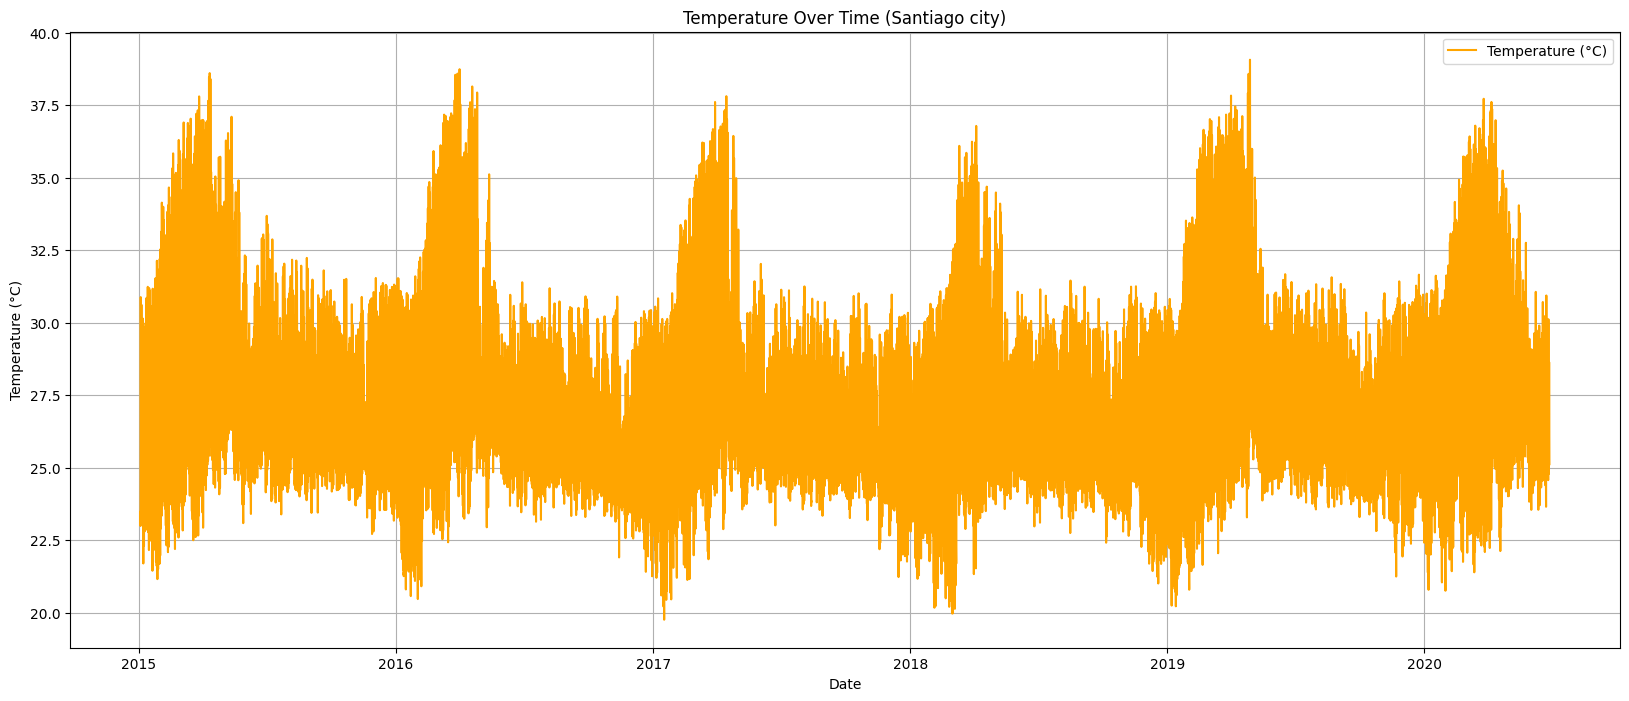

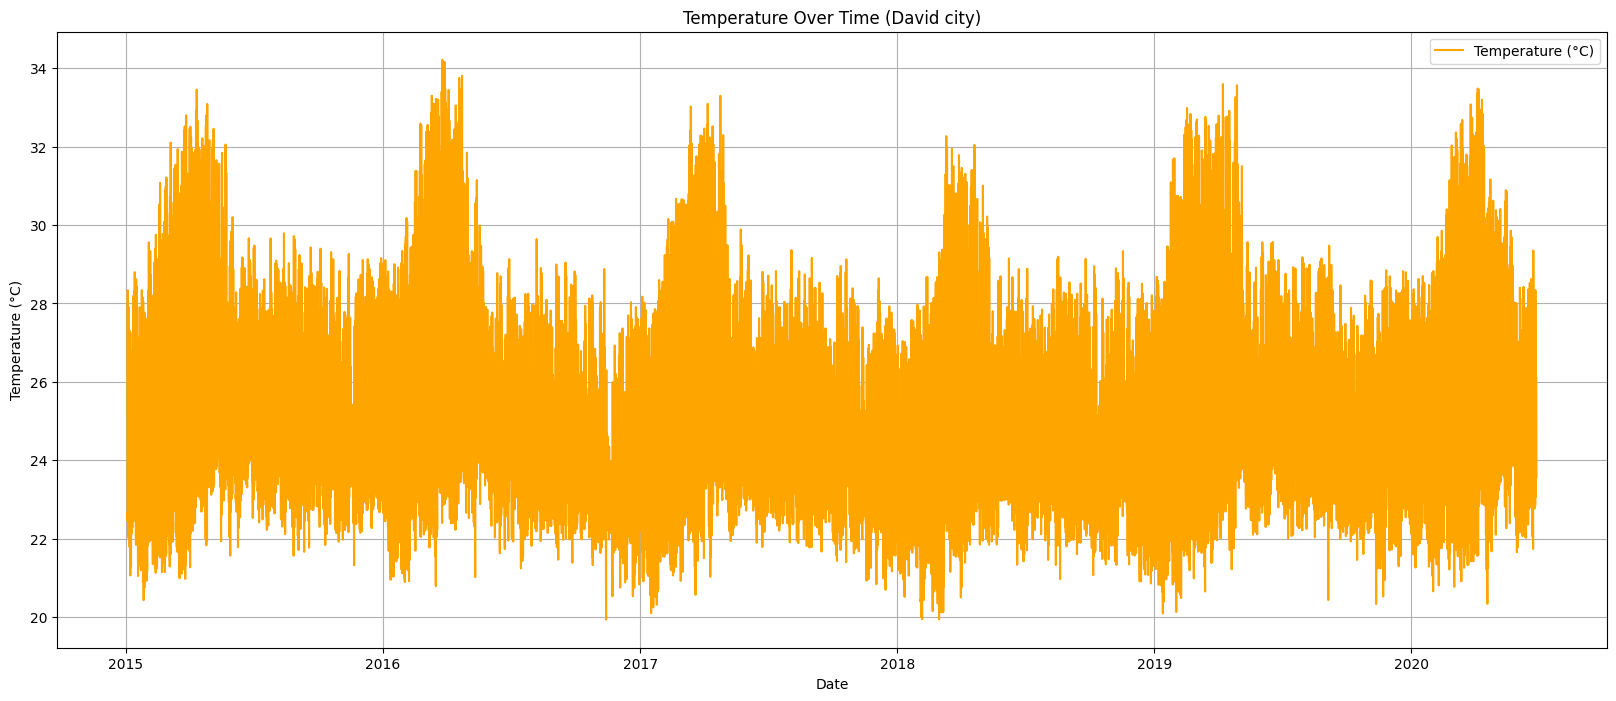

In [15]:
#Tocumen city
plt.figure(figsize=(20, 8))
plt.plot(df_train.index, df_train["T2M_toc"], color='orange', label="Temperature (°C)")
plt.title("Temperature Over Time (Tocumen city)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()

# Santiago city
plt.figure(figsize=(20, 8))
plt.plot(df_train.index, df_train["T2M_san"], color='orange', label="Temperature (°C)")
plt.title("Temperature Over Time (Santiago city)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()

# David city
plt.figure(figsize=(20, 8))
plt.plot(df_train.index, df_train["T2M_dav"], color='orange', label="Temperature (°C)")
plt.title("Temperature Over Time (David city)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()

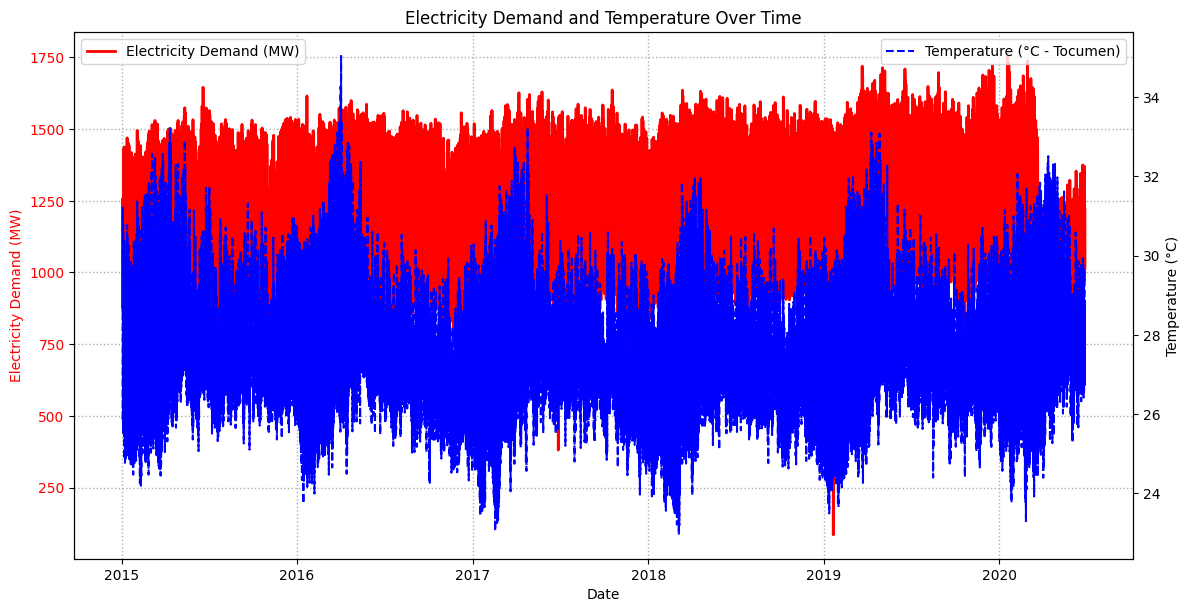

In [16]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot nat_demand
ax1.plot(df_train.index, df_train["nat_demand"], color='red', label="Electricity Demand (MW)", linewidth=2)
ax1.set_xlabel("Date")
ax1.set_ylabel("Electricity Demand (MW)", color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()

# Plot temperature Tocumen city
ax2.plot(df_train.index, df_train["T2M_toc"], color='blue', label="Temperature (°C - Tocumen)", linestyle='--')
ax2.set_ylabel("Temperature (°C)", color='black')
ax2.tick_params(axis='y', labelcolor='black')

ax1.grid(True, linestyle=':', linewidth=1)
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title("Electricity Demand and Temperature Over Time")
plt.show()

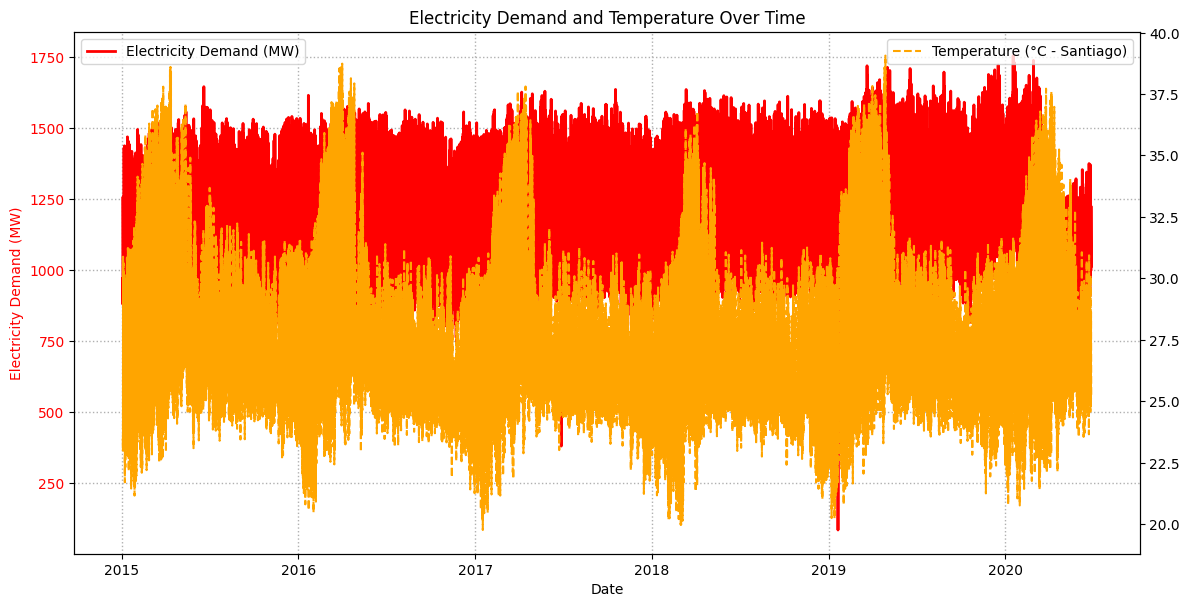

In [17]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot nat_demand
ax1.plot(df_train.index, df_train["nat_demand"], color='red', label="Electricity Demand (MW)", linewidth=2)
ax1.set_xlabel("Date")
ax1.set_ylabel("Electricity Demand (MW)", color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()

# Plot temperature for Santiago city
ax2.plot(df_train.index, df_train["T2M_san"], color='orange', label="Temperature (°C - Santiago)", linestyle='--')

ax1.grid(True, linestyle=':', linewidth=1)
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title("Electricity Demand and Temperature Over Time")
plt.show()

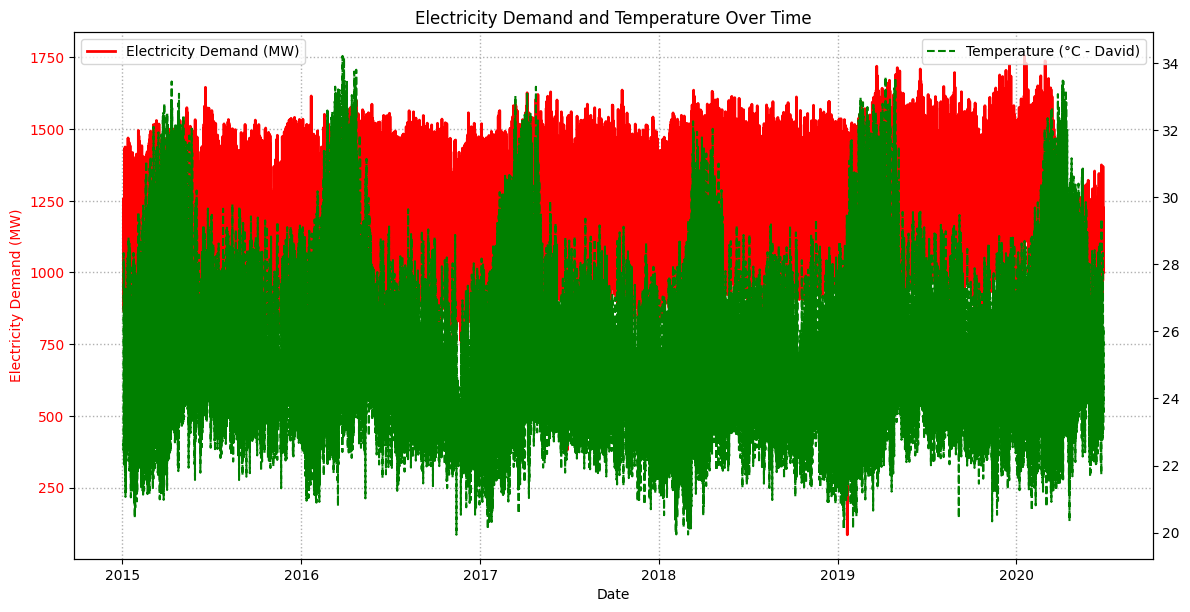

In [18]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot nat_demand
ax1.plot(df_train.index, df_train["nat_demand"], color='red', label="Electricity Demand (MW)", linewidth=2)
ax1.set_xlabel("Date")
ax1.set_ylabel("Electricity Demand (MW)", color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()

# Plot temperature for David city
ax2.plot(df_train.index, df_train["T2M_dav"], color='green', label="Temperature (°C - David)", linestyle='--')

ax1.grid(True, linestyle=':', linewidth=1)
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title("Electricity Demand and Temperature Over Time")
plt.show()

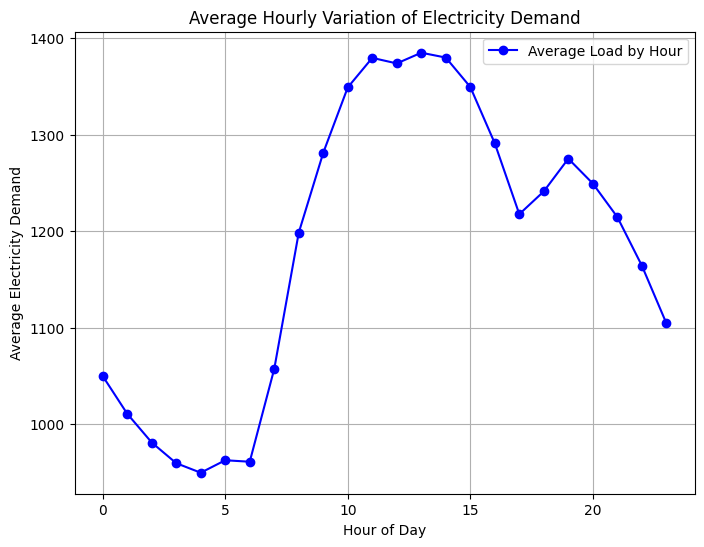

In [19]:
hourly_data = df_train.resample('H').mean()
hourly_data['Hour'] = hourly_data.index.hour

# Compute average load for each hour of the day
average_hourly_load = hourly_data.groupby('Hour').mean()

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(average_hourly_load.index, average_hourly_load['nat_demand'], label="Average Load by Hour", marker="o", color="b")
plt.xlabel("Hour of Day")
plt.ylabel("Average Electricity Demand")
plt.title("Average Hourly Variation of Electricity Demand")
plt.grid(True)
plt.legend()

plt.show()

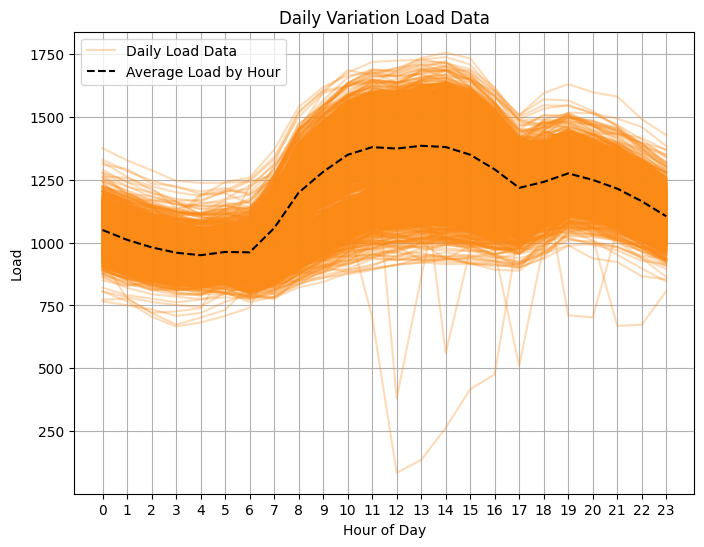

In [20]:
hourly_data = df_train.resample('H').mean()
hourly_data['Hour'] = hourly_data.index.hour
average_hourly_load = hourly_data.groupby('Hour').mean()
plt.figure(figsize=(8, 6))

df_train = df_train.copy()
df_train['Hour'] = df_train.index.hour

for day, group in df_train.groupby(df_train.index.date):
    plt.plot(group['Hour'], group['nat_demand'], color='#fb8a17', alpha=0.3, label="Daily Load Data" if day == list(df_train.index.date)[0] else "")

plt.plot(average_hourly_load.index, average_hourly_load['nat_demand'], label="Average Load by Hour", color="black", linestyle='--')

plt.xlabel("Hour of Day")
plt.ylabel("Load")
plt.title("Daily Variation Load Data")
plt.xticks(np.arange(0, 24, 1))  # Set x-axis ticks for each hour
plt.grid(True)
plt.legend()

plt.show()

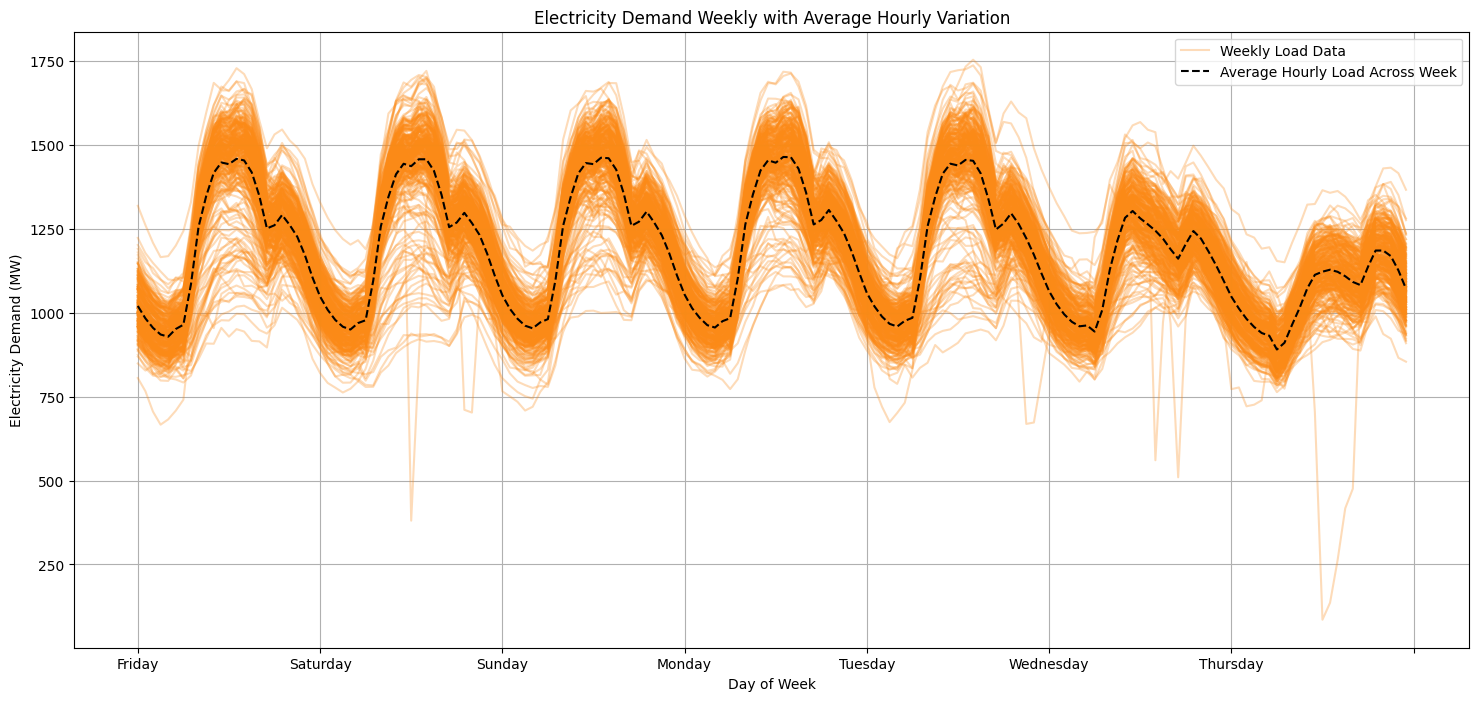

In [21]:
df_train['Week'] = df_train.index.to_period('W').start_time
hourly_data = df_train.resample('H').mean()

# Extract day of the week and hour of the day
hourly_data['DayOfWeek'] = hourly_data.index.dayofweek
hourly_data['Hour'] = hourly_data.index.hour
average_hourly_load_weekly = hourly_data.groupby(['DayOfWeek', 'Hour'])['nat_demand'].mean().unstack()

hours = np.arange(168)
weekly_load = np.zeros(168)

for day in range(7):
    weekly_load[day*24:(day+1)*24] = average_hourly_load_weekly.loc[day].values

average_weekly_load = df_train.groupby('Week')['nat_demand'].mean()


avg_load = np.zeros(168)
num_weeks = len(average_weekly_load)
for week, avg in average_weekly_load.items():
    start_hour = (week - df_train['Week'].min()).total_seconds() / 3600
    avg_load[int(start_hour):int(start_hour)+168] = avg

plt.figure(figsize=(18, 8))

for week, group in df_train.groupby('Week'):
    hours_from_week_start = (group.index - week).total_seconds() / 3600
    plt.plot(hours_from_week_start, group['nat_demand'], color='#fb8a17', alpha=0.3, label="Weekly Load Data" if week == df_train['Week'].min() else "")

plt.plot(hours, weekly_load, color="black", linestyle='--', label="Average Hourly Load Across Week")
plt.xticks(ticks=np.arange(0, 169, 24), labels=['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', ' '])
plt.xlabel("Day of Week")
plt.ylabel("Electricity Demand (MW)")
plt.title("Electricity Demand Weekly with Average Hourly Variation")
plt.grid(True)
plt.legend()
plt.show()

# Split Data

In [22]:
df_train

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school,Hour,Week
datetime,,,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0,1,2014-12-29
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0,2,2014-12-29
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0,3,2014-12-29
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0,4,2014-12-29
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0,5,2014-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26 20:00:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0,0,1,20,2020-06-22
2020-06-26 21:00:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0,0,1,21,2020-06-22
2020-06-26 22:00:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0,0,1,22,2020-06-22


In [23]:
'''
df_train['datetime'] = pd.to_datetime(df_train['datetime'])
df_train.set_index('datetime', inplace=True)
'''

"\ndf_train['datetime'] = pd.to_datetime(df_train['datetime'])\ndf_train.set_index('datetime', inplace=True)\n"

In [24]:
from sklearn.preprocessing import MinMaxScaler
features = df_train[['QV2M_toc', 'TQL_toc', 'W2M_toc', 'QV2M_san', 'TQL_san', 'W2M_san', 'QV2M_dav', 'TQL_dav', 'W2M_dav','T2M_toc', 'T2M_san', 'T2M_dav']]
labels = df_train['nat_demand']
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

X = features_scaled.reshape(features_scaled.shape[0], 1, features_scaled.shape[1])
y = labels.values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [25]:
print(f"Training sequences shape: {X_train.shape}, Target shape: {y_train.shape}")
print(f"Testing sequences shape: {X_test.shape}, Target shape: {y_test.shape}")
print(f"Validation sequences shape: {X_val.shape}, Target shape: {X_val.shape}")

Training sequences shape: (38438, 1, 12), Target shape: (38438,)
Testing sequences shape: (4805, 1, 12), Target shape: (4805,)
Validation sequences shape: (4805, 1, 12), Target shape: (4805, 1, 12)


# Predict with BiLSTM-Attention

In [26]:
import os
import random
def model_BiLSTM_attention(train_data, target_train, X_val, y_val, Nepochs):
    seed_value = 110
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    
    input_shape = (train_data.shape[1], train_data.shape[2])
    inputs = Input(shape=input_shape)
    
    x = Bidirectional(LSTM(89, return_sequences=True))(inputs)
    x = Dropout(0.4)(x)
    
    x = Bidirectional(LSTM(units=16, return_sequences=True))(x)
    x = Bidirectional(LSTM(units=8, recurrent_activation='sigmoid', return_sequences=True))(x)
    
    attention_output = Attention()([x, x])
    
    x = Concatenate()([x, attention_output])
    outputs = LSTM(units=1, activation='relu')(x)

    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    optimizer = tf.keras.optimizers.Adam(0.0024021)
    model.compile(loss=tf.keras.losses.Huber(delta=1.0), optimizer=optimizer, metrics=['mse'])

    callback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]
    modelhist = model.fit(train_data, target_train, epochs=Nepochs, shuffle=True,
                          batch_size=16, validation_data=(X_val, y_val), callbacks=callback)
    
    model.summary()
    return model, modelhist


In [27]:
Nepochs = 1000
model, modelhist = model_BiLSTM_attention(X_train, y_train, X_val, y_val, Nepochs)

Epoch 1/1000
2403/2403 [==============================] - 22s 6ms/step - loss: 1100.6068 - mse: 1251260.6250 - val_loss: 1024.2100 - val_mse: 1087787.6250
Epoch 2/1000
2403/2403 [==============================] - 12s 5ms/step - loss: 953.0790 - mse: 948089.7500 - val_loss: 877.6285 - val_mse: 808866.3750
Epoch 3/1000
2403/2403 [==============================] - 12s 5ms/step - loss: 806.5898 - mse: 690045.5625 - val_loss: 731.1672 - val_mse: 573073.8750
Epoch 4/1000
2403/2403 [==============================] - 12s 5ms/step - loss: 660.1374 - mse: 475081.9688 - val_loss: 584.7512 - val_mse: 380188.5938
Epoch 5/1000
2403/2403 [==============================] - 12s 5ms/step - loss: 513.7123 - mse: 302892.1562 - val_loss: 438.4339 - val_mse: 230225.2188
Epoch 6/1000
2403/2403 [==============================] - 12s 5ms/step - loss: 367.9780 - mse: 173997.9688 - val_loss: 295.9401 - val_mse: 123974.7812
Epoch 7/1000
2403/2403 [==============================] - 12s 5ms/step - loss: 243.1416 - 

In [28]:
model.save('attention_load.h5')

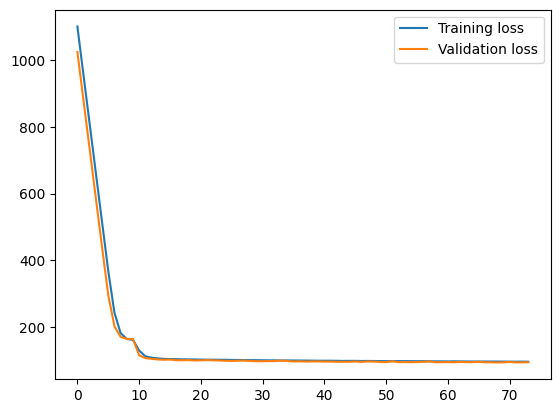

In [29]:
plt.plot(modelhist.history['loss'], label='Training loss')
plt.plot(modelhist.history['val_loss'], label='Validation loss')
plt.legend()

In [30]:
predictions = model.predict(X_test)

151/151 [==============================] - 2s 2ms/step


In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from numpy import cov, array

predictions = predictions.flatten() 
def calculate_metrics(y_true, y_pred):
    # R² (Coefficient of Determination)
    r2 = r2_score(y_true, y_pred)

    # RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    # MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # CC (Correlation Coefficient)
    cc = np.corrcoef(y_true, y_pred)[0, 1]

    return r2, rmse, mape, cc

r2, rmse, mape, cc = calculate_metrics(y_test, predictions)

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"Correlation Coefficient (CC): {cc:.4f}")

R²: 0.5557
RMSE: 126.5736
MAPE: 8.5007%
Correlation Coefficient (CC): 0.7553


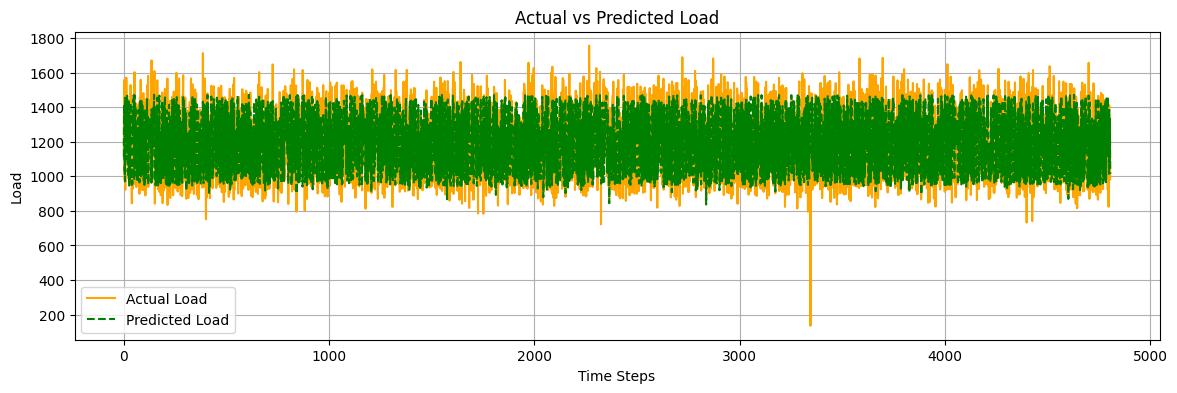

In [32]:
plt.figure(figsize=(14, 4))
plt.plot(y_test, label='Actual Load', color='orange')
plt.plot(predictions, label='Predicted Load', color='green', linestyle='--')
plt.title('Actual vs Predicted Load')
plt.xlabel('Time Steps')
plt.ylabel('Load')
plt.legend()
plt.grid()
plt.show()

In [33]:
print("First 100 Predicted vs Actual Selling Prices:")
for i in range(100):
    print(f"Predicted: {predictions[i]:.2f}, Actual: {y_test[i]:.2f}")

First 100 Predicted vs Actual Selling Prices:
Predicted: 1111.64, Actual: 1156.65
Predicted: 1417.86, Actual: 1469.37
Predicted: 1324.97, Actual: 1335.72
Predicted: 1383.08, Actual: 1557.73
Predicted: 1010.95, Actual: 976.70
Predicted: 1134.23, Actual: 1164.68
Predicted: 970.78, Actual: 1044.80
Predicted: 1454.30, Actual: 921.49
Predicted: 1298.48, Actual: 1254.19
Predicted: 1336.97, Actual: 1104.49
Predicted: 1239.35, Actual: 1282.48
Predicted: 1349.38, Actual: 1431.57
Predicted: 1448.70, Actual: 1570.43
Predicted: 1391.97, Actual: 1487.82
Predicted: 1098.94, Actual: 1083.15
Predicted: 1273.41, Actual: 1208.27
Predicted: 1465.61, Actual: 1127.29
Predicted: 1169.00, Actual: 1209.36
Predicted: 1400.87, Actual: 1445.90
Predicted: 1027.20, Actual: 1089.25
Predicted: 1037.97, Actual: 1258.16
Predicted: 1001.70, Actual: 988.38
Predicted: 1302.32, Actual: 1282.64
Predicted: 1365.46, Actual: 1151.95
Predicted: 1443.34, Actual: 1123.57
Predicted: 1394.70, Actual: 1218.58
Predicted: 946.65, Act

In [34]:
"""
results = pd.DataFrame({
    'Predicted': predictions,
    'Actual': y_test
})
results.to_csv('load_predict_lstm.csv', index=False)
"""

"\nresults = pd.DataFrame({\n    'Predicted': predictions,\n    'Actual': y_test\n})\nresults.to_csv('load_predict_lstm.csv', index=False)\n"

# Predict BiLSTM

In [35]:
def model_BiLSTM(train_data, target_train, X_val, y_val, Nepochs):
    seed_value = 110
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    
    input_shape = (train_data.shape[1], train_data.shape[2])
    inputs = Input(shape=input_shape)
    
    x = Bidirectional(LSTM(89, return_sequences=True))(inputs)
    x = Dropout(0.4)(x)
    
    x = Bidirectional(LSTM(units=16, return_sequences=True))(x)
    x = Bidirectional(LSTM(units=8, recurrent_activation='sigmoid', return_sequences=True))(x)

    outputs = LSTM(units=1, activation='relu')(x)

    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    optimizer = tf.keras.optimizers.Adam(1e-3)
    model.compile(loss=tf.keras.losses.Huber(delta=1.0), optimizer=optimizer, metrics=['mse'])

    callback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]
    modelhist = model.fit(train_data, target_train, epochs=Nepochs, shuffle=True,
                          batch_size=16, validation_data=(X_val, y_val), callbacks=callback)
    
    model.summary()
    return model, modelhist


In [36]:
Nepochs = 1000
model, modelhist = model_BiLSTM(X_train, y_train, X_val, y_val, Nepochs)

Epoch 1/1000
2403/2403 [==============================] - 20s 5ms/step - loss: 1161.6526 - mse: 1387598.5000 - val_loss: 1142.7200 - val_mse: 1344709.7500
Epoch 2/1000
2403/2403 [==============================] - 13s 5ms/step - loss: 1128.9293 - mse: 1312605.0000 - val_loss: 1110.9072 - val_mse: 1272983.2500
Epoch 3/1000
2403/2403 [==============================] - 12s 5ms/step - loss: 1097.1970 - mse: 1241906.1250 - val_loss: 1079.2112 - val_mse: 1203531.5000
Epoch 4/1000
2403/2403 [==============================] - 12s 5ms/step - loss: 1065.5051 - mse: 1173338.7500 - val_loss: 1047.5166 - val_mse: 1136095.1250
Epoch 5/1000
2403/2403 [==============================] - 11s 5ms/step - loss: 1033.8109 - mse: 1106737.3750 - val_loss: 1015.8202 - val_mse: 1070664.2500
Epoch 6/1000
2403/2403 [==============================] - 12s 5ms/step - loss: 1002.1169 - mse: 1042195.1250 - val_loss: 984.1246 - val_mse: 1007242.1875
Epoch 7/1000
2403/2403 [==============================] - 11s 5ms/step 

In [37]:
predictions = model.predict(X_test)

151/151 [==============================] - 2s 2ms/step


In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from numpy import cov, array

predictions = predictions.flatten() 
def calculate_metrics(y_true, y_pred):
    # R² (Coefficient of Determination)
    r2 = r2_score(y_true, y_pred)

    # RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    # MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # CC (Correlation Coefficient)
    cc = np.corrcoef(y_true, y_pred)[0, 1]

    return r2, rmse, mape, cc

r2, rmse, mape, cc = calculate_metrics(y_test, predictions)

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"Correlation Coefficient (CC): {cc:.4f}")

R²: 0.5442
RMSE: 128.2026
MAPE: 8.5298%
Correlation Coefficient (CC): 0.7511


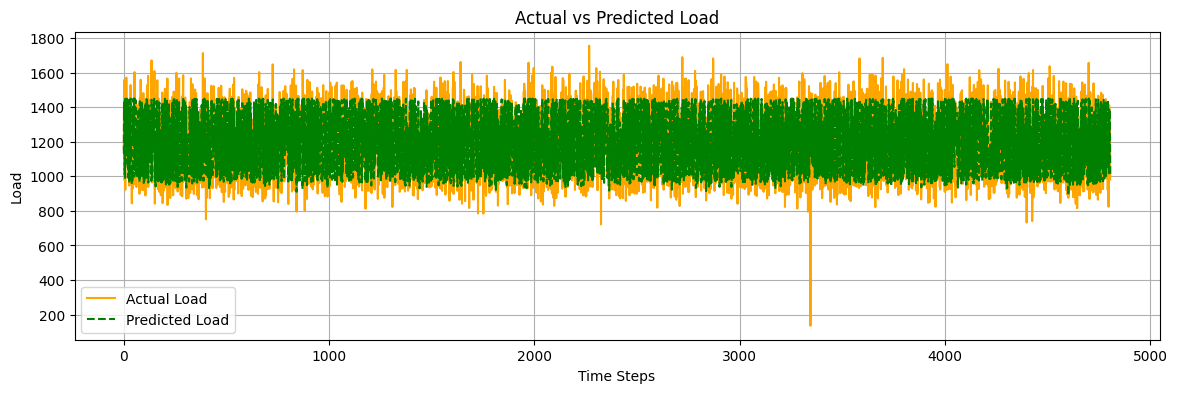

In [39]:
plt.figure(figsize=(14, 4))
plt.plot(y_test, label='Actual Load', color='orange')
plt.plot(predictions, label='Predicted Load', color='green', linestyle='--')
plt.title('Actual vs Predicted Load')
plt.xlabel('Time Steps')
plt.ylabel('Load')
plt.legend()
plt.grid()
plt.show()